## import python libraries and define functions
#####  numpy, h5 file reader, matplotlib - plotting

In [20]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import scipy.io
import os
import re
from utils import *

## Next define keys (data parameters) to be loaded and define function to load data
#### (1) keys_to_combine: some keys loaded for each shot & stored per shot (2) keys_to_sum: some keys loaded per each run and added (3) keys_to_check : check if some keys exits and have same values in all runs and load these keys 

# Load the data into defined variables
#### note if there is some error loading a key, then comment it out and try to load data. 
#### sometimes keys of a data parameter may be saved with different name, print out all keys to figure out the required key

In [21]:
keys_to_combine = ['jungfrau4M/azav_azav',
                   'ipm_dg2/sum',
                    #'ipm_dg3/sum',
                   #'ipm_hfx_dg2/sum',
                   #'alvium_u1/laser_com',
                   #'alvium_u1/laser_sum',
                   #'Acqiris/FastTiming_area',
                   'gas_detector/f_11_ENRC',
                   'ebeam/photon_energy',
                   'evr/code_183',
                   'evr/code_137',
                   'evr/code_141',
                   'lightStatus/laser',
                   'lightStatus/xray']

keys_to_sum = ['Sums/jungfrau4M_calib']
#               'Sums/jungfrau4M_calib_thresADU1']

keys_to_check = ['UserDataCfg/jungfrau4M/azav__azav_q',
                'UserDataCfg/jungfrau4M/azav__azav_qbin',
                'UserDataCfg/jungfrau4M/azav__azav_qbins',
                 'UserDataCfg/jungfrau4M/x',
                 'UserDataCfg/jungfrau4M/y',
                 'UserDataCfg/jungfrau4M/z',
                 'UserDataCfg/jungfrau4M/azav__azav_matrix_q',
                 'UserDataCfg/jungfrau4M/azav__azav_matrix_phi',
                #'UserDataCfg/jungfrau4M/cmask',
                # 'UserDataCfg/jungfrau4M/Full_thres__Full_thres_thresADU',
                # 'UserDataCfg/jungfrau4M/Full_thres__Full_thres_bound',
                'UserDataCfg/jungfrau4M/common_mode_pars']
###############################################
runNumbers = [24,26,29,43,58,111,128]  # enter the runnumbers to be loaded
folder = '/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/' # insert here the directory path where .h5 files are stored
###############################################
# Load the data in
data = combineRuns(runNumbers, folder, keys_to_combine, keys_to_sum, keys_to_check, verbose=False)  # this is the function to load the data with defined keys

azav = np.squeeze(data['jungfrau4M/azav_azav']) # I(q) : 1D azimuthal average of signals in each q bin

qbin = data['UserDataCfg/jungfrau4M/azav__azav_qbin'] # q bin-size

q = data['UserDataCfg/jungfrau4M/azav__azav_q'] # q bins 
qbins = data['UserDataCfg/jungfrau4M/azav__azav_qbins'] # q bins
matrix_q = data['UserDataCfg/jungfrau4M/azav__azav_matrix_q'].reshape(8,512,1024)  # q matrix Jungfrau shaped
matrix_phi = data['UserDataCfg/jungfrau4M/azav__azav_matrix_phi'].reshape(8,512,1024) # phi for anisotropic data

laserOn = data['evr/code_183'].astype(bool)  # laser on events
xrayOn = data['evr/code_137'].astype(bool)  # xray on events
laserOn2 = data['lightStatus/laser'].astype(bool)  # laser on events 
xrayOn2 = data['lightStatus/xray'].astype(bool)  # xray on events

jungfrau_sum = data['Sums/jungfrau4M_calib']  # Total Jungfrau detector counts summed in a run
#jungfrau_sum = data['Sums/jungfrau4M_calib_thresADU1']   # Total Jungfrau detector counts with Thresholds added, summed in a run 
#jungfrau_sum[jungfrau_sum>100*np.median(jungfrau_sum)]=0  # threshold on Jungfrau


x = data['UserDataCfg/jungfrau4M/x'] # coordinates of Jungfrau detector x,y,z
y = data['UserDataCfg/jungfrau4M/y']
z = data['UserDataCfg/jungfrau4M/z'] 

#cmask = data['UserDataCfg/jungfrau4M/cmask'].astype(bool) # Mask for detector created 
run_indicator = data['run_indicator'] # run indicator for each shot

#UV_com = data['alvium_u1/laser_com']  # center of mass for laser (pump) pointing
#UV_sum = data['alvium_u1/laser_sum']   # intensity sum for laser (pump) pointing
#Acqiris_FastTiming = data['Acqiris/FastTiming_area']  # diode signal for laser after interaction
#Acqiris_Laser = data['Acqiris/Laser_area'] # diode signal for laser before interaction

dg2 = data['ipm_dg2/sum']   # upstream diode x-ray intensity
#dg3 = data['ipm_dg3/sum']    # downstream diode x-ray intensity
#pressure = data['epicsAll/gasCell_pressure']  # pressure in gas cell
xray_energy = data['gas_detector/f_11_ENRC']   # xray energy from gas detector (not calibrated to actual values)
xray_eV = data['ebeam/photon_energy']    # x-ray energy energy in eV

/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0024.h5
/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0026.h5
/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0029.h5
/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0043.h5
/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0058.h5
/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0111.h5
/sdf/data/lcls/ds/cxi/cxil1035023/hdf5/smalldata/cxil1035023_Run0128.h5


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 69 and the array at index 1 has size 62

# plot the raw Jungfrau Sum as a check

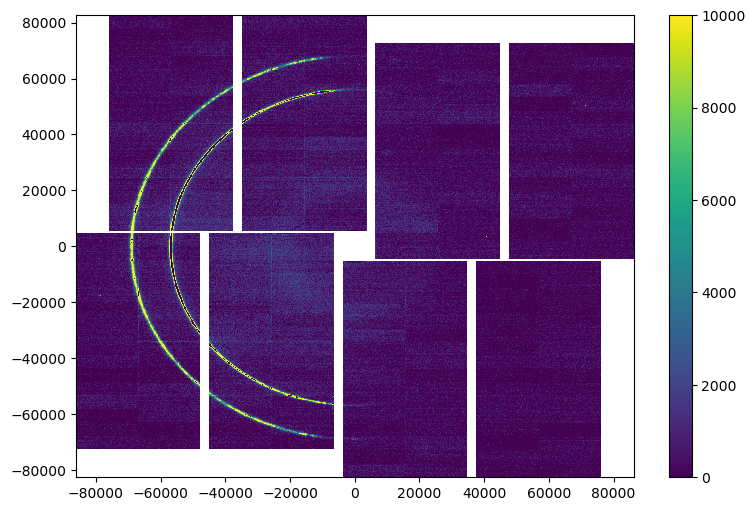

In [9]:
jungfrau_sum[jungfrau_sum>100*np.median(jungfrau_sum)]=0 
plt.figure(figsize=(9,6))
pcm = plot_jungfrau(y,-x,jungfrau_sum,vmin=0,vmax=1e4)
plt.colorbar(pcm)
plt.show()

# Runs compare : background signal


15058


/lscratch/davidjr/tmp/ipykernel_89841/2777804635.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(qbins[:-1], np.log10(azav_run[:, j]), label=f'Run {run} {runtype[j]}')


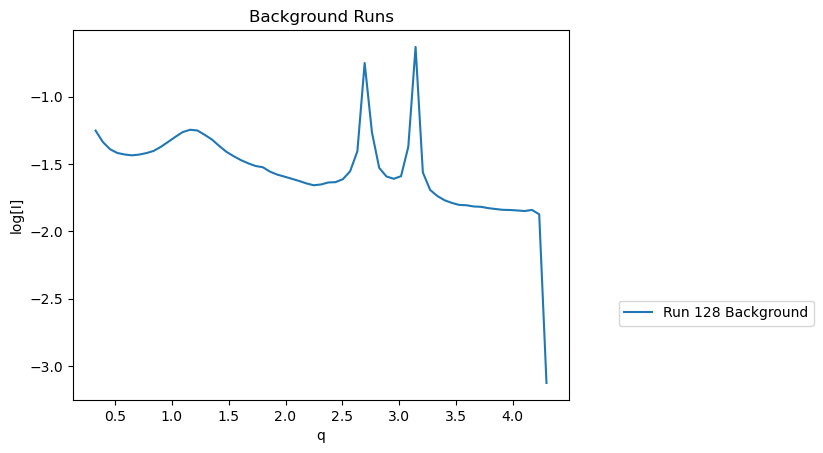

In [19]:
azav_run = np.zeros(((azav[0,:].size), np.unique(run_indicator).size)) # I(q) per run

runtype = ['Background',
          'Argon',
          'Background',
          'Background',
          'Background',
          'Background',
          'Background']

j = 0 
for run in runNumbers:
    timebin_run = np.where((run_indicator == run))[0] 
    print(timebin_run.size)
    azav_run[:,j] = np.nanmean(azav[timebin_run],axis=0)
    plt.plot(qbins[:-1], np.log10(azav_run[:, j]), label=f'Run {run} {runtype[j]}')
    j +=1
plt.xlabel('q')
plt.ylabel('log[I]')
plt.legend(loc=(1.1,0.2))
#plt.xlim(0,16)
#plt.ylim(-0.4,0.8)
plt.title('Background Runs')
plt.show()

### Save the data to the backgrounds folder

In [20]:
runType = 'Background' # Edit this for the type of run
backgroundFolder = 'Backgrounds'
bkgAzav = (azav_run[:,0])
# np.savez(f'{backgroundFolder}/Background_Run_{runNumbers[0]}.npz',x=qbins[:-1],y=np.log10(y))
np.savez(f'{backgroundFolder}/Run_{runNumbers[0]}_{runType}.npz',x=qbins[:-1],y=np.log10(bkgAzav))

/lscratch/davidjr/tmp/ipykernel_2262899/1331348455.py:5: RuntimeWarning: divide by zero encountered in log10
  np.savez(f'{backgroundFolder}/Run_{runNumbers[0]}_{runType}.npz',x=qbins[:-1],y=np.log10(bkgAzav))


## plot background for each run

Skipped File: .ipynb_checkpoints


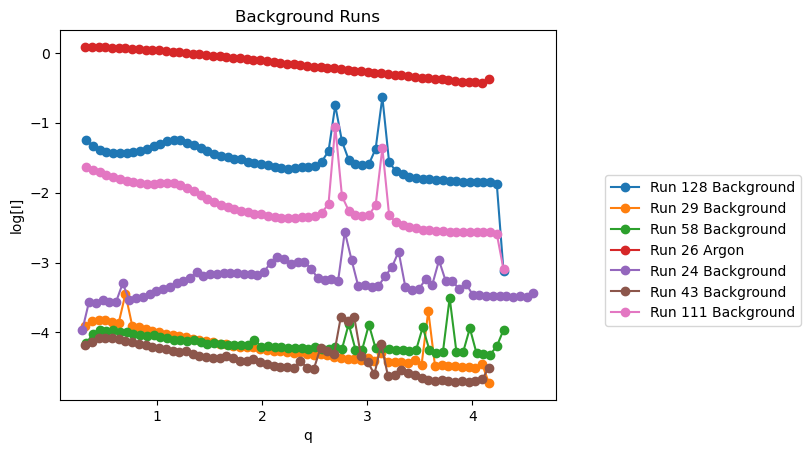

In [23]:
import scipy.io
plt.figure()
# Regular expression pattern for matching filenames
pattern = re.compile(r'^Run_(\d+)_(.+?)\.npz$')

# Loop through all files in the background folder
for filename in os.listdir(backgroundFolder):
    match = pattern.match(filename)
    if match:
        parts = filename.split('_')
        # Extract the run number (second part)
        run_number = int(parts[1])
        # Extract the title (third part, remove .npz)
        title = parts[2].replace('.npz', '')
        # Load the .npz file
        file_path = os.path.join(backgroundFolder, filename)
        data = np.load(file_path)
        plt.plot(data['x'],data['y'],linestyle='-',marker = 'o',linewidth = 1.5,label=f'Run {run_number} {title}')
    else:
        print(f'Skipped File: {filename}')
        
plt.xlabel('q')
plt.ylabel('log[I]')
plt.legend(loc=(1.1,0.2))
#plt.xlim(0,16)
#plt.ylim(-0.4,0.8)
plt.title('Background Runs')
plt.show()